# Assignment 03

Sabarno Saha, 22MS037.

## Problem 1

Moran's Process with selection.



In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# NJIT is needed, otherwise the moran process takes around 5 mins to run.
from numba import njit


# # Use the scienceplots package for nicer plot themes.
# import scienceplots
# plt.style.use(['science'])

# # Just some config to make plots legible in pdfs
# plt.rcParams.update({'font.size': 20,  'axes.labelweight': 'bold', 'font.family': 'sans-serif', 'legend.fontsize': 15})

In [8]:
@njit
def moran_fitness(pop,T,r):
    """
    moran_neutral 
    Returns a population updated by the Moran Process

    Parameters
    ----------
    pop : array
        Initial Population
    T : int
        Maximum Number of generations(to prevent infinite loops)
    r: float
        Relative fitness of type A compared to type B. If r > 1, type A is more fit than type B, if r < 1, type A is less fit than type B, and if r = 1, both types have equal fitness (neutral case).
    """
    pop = np.asarray(pop)
    freq = np.zeros((T,2))
    N = len(pop)
    freq[0,0] = np.sum(pop)
    freq[0,1] =  N - freq[0,0]
    # print(freq[0,0],freq[0,1])
    for t in range(1,T):

        
        
        total_fitness = freq[t-1,0]*r + freq[t-1,1]
        reproduction_probs =[
            (freq[t-1,0]*r)/total_fitness, # Probability of choosing type A for reproduction
            (freq[t-1,1])/total_fitness     # Probability of choosing type B for reproduction
        ]
        death_probs = [
            freq[t-1,0]/N, # Probability of choosing type A for death
            freq[t-1,1]/N  # Probability of choosing type B for death
        ]
        
        # reproduce_idx = np.random.choice([0,1], p=reproduction_probs)
        reproduce_idx = int(np.random.rand() > reproduction_probs[0])  # True if type A reproduces, False if type B reproduce
        
    
        
        # Choose an individual to die
        # die_idx = np.random.choice([0,1], p=death_probs)
        die_idx = int(np.random.rand() > death_probs[0])  # True if type A dies, False if type B dies
        
        # Update population counts
        if reproduce_idx == 0 and die_idx == 1:
            # Type 0 reproduces, type 1 dies
            freq[t,0] = freq[t-1,0] + 1
            freq[t,1] = freq[t-1,1] - 1
        elif reproduce_idx == 1 and die_idx == 0:
            # Type 1 reproduces, type 0 dies
            freq[t,0] = freq[t-1,0] - 1
            freq[t,1] = freq[t-1,1] + 1
        else:
            # print("No change in population counts")
            # No change in population counts
            freq[t,0] = freq[t-1,0]
            freq[t,1] = freq[t-1,1]
        # print(freq[t,0],freq[t,1])
        # Check for fixation
        if freq[t,0] == 0 or freq[t,0] == N:
            # print(f"Fixation reached at generation {t}")
            # returns truncated frequency array
            return freq[:t+1,:]/N
    print("Maximum generations reached without fixation")
    return freq/N
        


In [9]:
def invasion_probability(r,i,N):
    """
    invasion_probability 
    Returns the probability of invasion of a single mutant of type A in a population of type B in the Moran Process with selection.

    Parameters
    ----------
    r: float
        Relative fitness of type A compared to type B. 
    i: int
        Initial number of mutants of type A in the population.
    N: int
        Total population size.
    """
    prob = (1 - r**(-i))/(1 - r**(-N))
    return prob

In [10]:
# population size
N_moran = 100

# Maximum number of generations(to prevent infinite loops)
T_max = int(1e6)

# Number of runs
Nt_moran = 1000

# Relative fitness of type A compared to type B
r = 1.01

In [11]:
%%time

## Find fixation probabilites
fixation_probs = np.zeros(2)
sample_trajectory = []

for run in range(Nt_moran):
    pop_0 = np.zeros(N_moran)
    #ensuring that only one mutant of type A is present.
    pop_0[0] = 1
    
    # Run the Moran process
    freq = moran_fitness(pop_0,T_max,r)
    fixation_probs += freq[-1]
    
    print(f"Run {run+1}/{Nt_moran}")
  
# Normalize to get probabilities  
fixation_probs /= Nt_moran

Run 1/1000
Run 2/1000
Run 3/1000
Run 4/1000
Run 5/1000
Run 6/1000
Run 7/1000
Run 8/1000
Run 9/1000
Run 10/1000
Run 11/1000
Run 12/1000
Run 13/1000
Run 14/1000
Run 15/1000
Run 16/1000
Run 17/1000
Run 18/1000
Run 19/1000
Run 20/1000
Run 21/1000
Run 22/1000
Run 23/1000
Run 24/1000
Run 25/1000
Run 26/1000
Run 27/1000
Run 28/1000
Run 29/1000
Run 30/1000
Run 31/1000
Run 32/1000
Run 33/1000
Run 34/1000
Run 35/1000
Run 36/1000
Run 37/1000
Run 38/1000
Run 39/1000
Run 40/1000
Run 41/1000
Run 42/1000
Run 43/1000
Run 44/1000
Run 45/1000
Run 46/1000
Run 47/1000
Run 48/1000
Run 49/1000
Run 50/1000
Run 51/1000
Run 52/1000
Run 53/1000
Run 54/1000
Run 55/1000
Run 56/1000
Run 57/1000
Run 58/1000
Run 59/1000
Run 60/1000
Run 61/1000
Run 62/1000
Run 63/1000
Run 64/1000
Run 65/1000
Run 66/1000
Run 67/1000
Run 68/1000
Run 69/1000
Run 70/1000
Run 71/1000
Run 72/1000
Run 73/1000
Run 74/1000
Run 75/1000
Run 76/1000
Run 77/1000
Run 78/1000
Run 79/1000
Run 80/1000
Run 81/1000
Run 82/1000
Run 83/1000
Run 84/1000
R

In [12]:
%%time

## Get a sample trajectory when invasion takes place.
sample_trajectory = []

for run in range(Nt_moran):
    pop_0 = np.zeros(N_moran)
    # Ensure that only one mutant of type A is present.
    pop_0[0] = 1
    
    # Run the Moran process
    freq = moran_fitness(pop_0,T_max,r)
    if freq[-1,0] == 1.0:
        sample_trajectory = freq
        break
    print(f"Run {run+1}/{Nt_moran}")
  

Run 1/1000
Run 2/1000
Run 3/1000
Run 4/1000
Run 5/1000
Run 6/1000
Run 7/1000
Run 8/1000
Run 9/1000
Run 10/1000
Run 11/1000
Run 12/1000
Run 13/1000
Run 14/1000
Run 15/1000
Run 16/1000
Run 17/1000
Run 18/1000
Run 19/1000
Run 20/1000
CPU times: user 19.1 ms, sys: 926 μs, total: 20.1 ms
Wall time: 19.7 ms


Text(0.5, 1.0, 'Example of Invasion in Moran Process(with Selection): Frequency vs Generations')

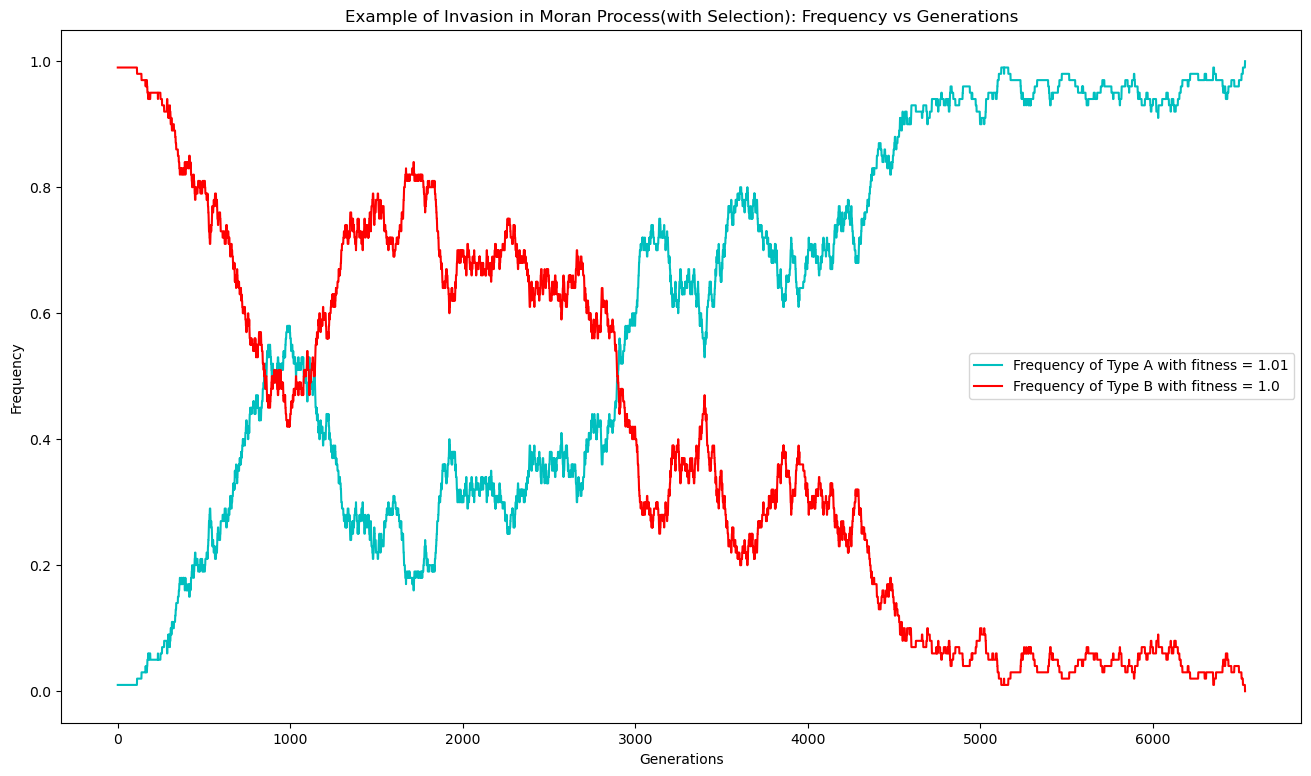

In [13]:
fig, axes = plt.subplots(figsize=(16,9))
axes.plot(sample_trajectory[:,0], label=f"Frequency of Type A with fitness = {r:.2f}", color='c')
axes.plot(sample_trajectory[:,1], label=f"Frequency of Type B with fitness = {1.0}", color='r')
axes.legend()
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title("Example of Invasion in Moran Process(with Selection): Frequency vs Generations")
# fig.savefig("images/moran_selection.png", dpi=300)

In [14]:
# Invasion probability from analytical formula
prob = invasion_probability(r,1,N_moran)
prob

0.015708656559792596

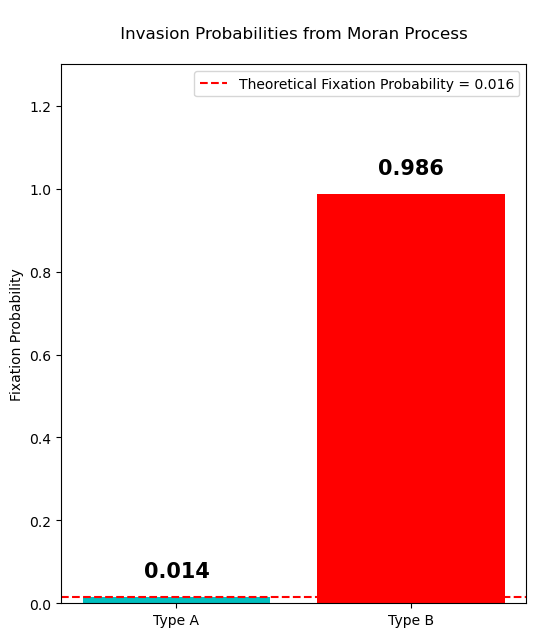

In [15]:
fig, axes = plt.subplots(figsize=(6,7))
axes.bar([0,1], fixation_probs, color=['c','r'])
axes.annotate(f"{fixation_probs[0]:.3f}", xy=(0, fixation_probs[0]), xytext=(0, fixation_probs[0]+0.05), ha='center', fontsize=15, fontweight='bold', color='black')
axes.annotate(f"{fixation_probs[1]:.3f}", xy=(1, fixation_probs[1]), xytext=(1, fixation_probs[1]+0.05), ha='center', fontsize=15, fontweight='bold', color='black')
axes.axhline(y=prob, color='r', linestyle='--', label=f'Theoretical Fixation Probability = {prob:.3f}')
axes.set_xticks([0,1])
axes.set_xticklabels(['Type A','Type B'])
axes.set_ylabel("Fixation Probability")
axes.set_ylim(0,1.3)
axes.set_title("\n Invasion Probabilities from Moran Process \n")
axes.legend()
# fig.savefig("images/moran_selection_invasion_1000.png", dpi=300)


## Problem 2

Moran Process with r=0.99 but starting at type A frequency of 0.5

In [16]:
# population size
N_moran = 100

# Maximum number of generations(to prevent infinite loops)
T_max = int(1e6)

# Number of runs
Nt_moran = 1000

# Relative fitness of type A compared to type B
r = 0.99

In [17]:
%%time


## Find fixation probabilites
fixation_probs = np.zeros(2)
sample_trajectory = []

pop_0 = np.zeros(N_moran)

#ensuring that half of the population is a mutant of type A is present.
pop_0[N_moran//2:] = 1
for run in range(Nt_moran):
    
    
    # Run the Moran process
    freq = moran_fitness(pop_0.copy(),T_max,r)
    fixation_probs += freq[-1]
    
    print(f"Run {run+1}/{Nt_moran}")
  
# Normalize to get probabilities  
fixation_probs /= Nt_moran

Run 1/1000
Run 2/1000
Run 3/1000
Run 4/1000
Run 5/1000
Run 6/1000
Run 7/1000
Run 8/1000
Run 9/1000
Run 10/1000
Run 11/1000
Run 12/1000
Run 13/1000
Run 14/1000
Run 15/1000
Run 16/1000
Run 17/1000
Run 18/1000
Run 19/1000
Run 20/1000
Run 21/1000
Run 22/1000
Run 23/1000
Run 24/1000
Run 25/1000
Run 26/1000
Run 27/1000
Run 28/1000
Run 29/1000
Run 30/1000
Run 31/1000
Run 32/1000
Run 33/1000
Run 34/1000
Run 35/1000
Run 36/1000
Run 37/1000
Run 38/1000
Run 39/1000
Run 40/1000
Run 41/1000
Run 42/1000
Run 43/1000
Run 44/1000
Run 45/1000
Run 46/1000
Run 47/1000
Run 48/1000
Run 49/1000
Run 50/1000
Run 51/1000
Run 52/1000
Run 53/1000
Run 54/1000
Run 55/1000
Run 56/1000
Run 57/1000
Run 58/1000
Run 59/1000
Run 60/1000
Run 61/1000
Run 62/1000
Run 63/1000
Run 64/1000
Run 65/1000
Run 66/1000
Run 67/1000
Run 68/1000
Run 69/1000
Run 70/1000
Run 71/1000
Run 72/1000
Run 73/1000
Run 74/1000
Run 75/1000
Run 76/1000
Run 77/1000
Run 78/1000
Run 79/1000
Run 80/1000
Run 81/1000
Run 82/1000
Run 83/1000
Run 84/1000
R

In [18]:
%%time

## Get a sample trajectory when invasion takes place.
sample_trajectory = []

for run in range(Nt_moran):
    pop_0 = np.zeros(N_moran)
    # Ensure that only one mutant of type A is present.
    pop_0[0:N_moran//2] = 1
    
    # Run the Moran process
    freq = moran_fitness(pop_0,T_max,r)
    if freq[-1,0] == 1.0:
        sample_trajectory = freq
        break
    print(f"Run {run+1}/{Nt_moran}")
  

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.44 ms


Text(0.5, 1.0, 'Example of Invasion in Moran Process(with Selection): Frequency vs Generations')

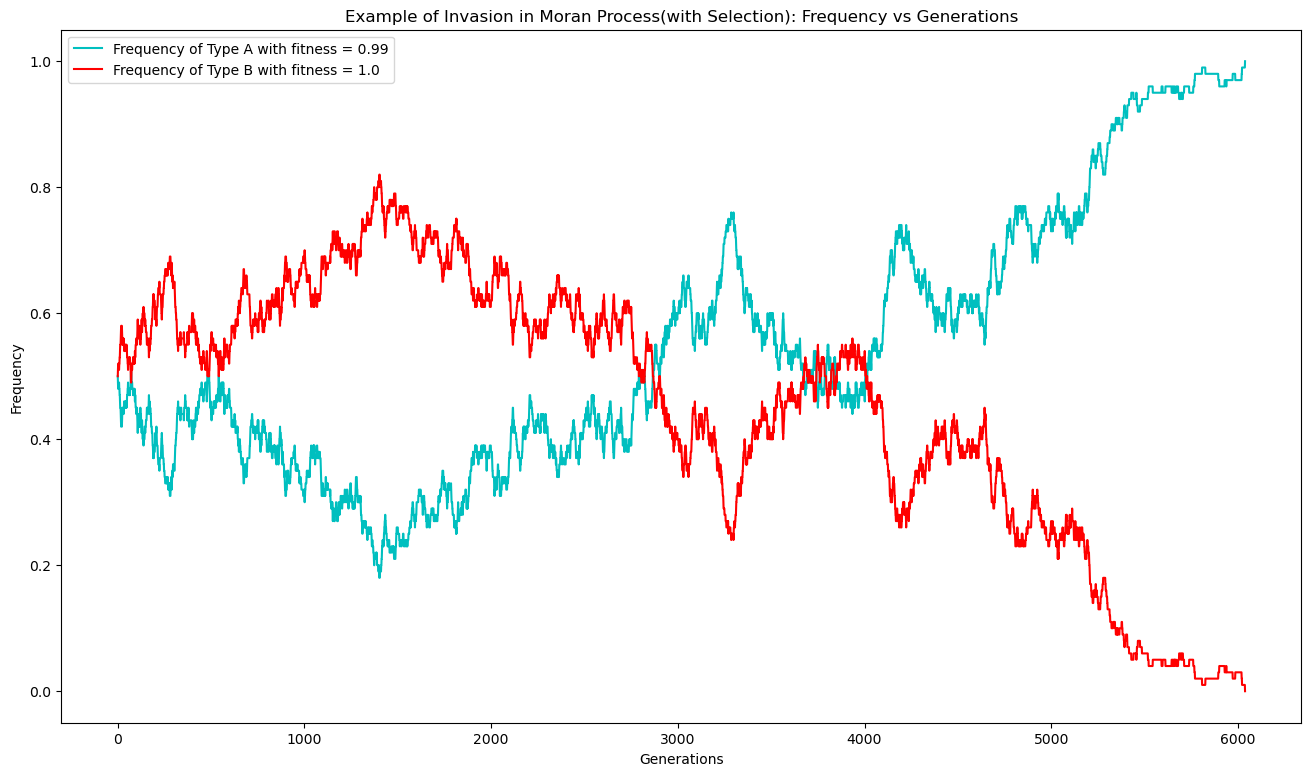

In [19]:
fig, axes = plt.subplots(figsize=(16,9))
axes.plot(sample_trajectory[:,0], label=f"Frequency of Type A with fitness = {r:.2f}", color='c')
axes.plot(sample_trajectory[:,1], label=f"Frequency of Type B with fitness = {1.0}", color='r')
axes.legend()
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title("Example of Invasion in Moran Process(with Selection): Frequency vs Generations")
# fig.savefig("images/moran_selection_p2.png", dpi=300)

In [20]:
# Invasion probability from analytical formula
prob_pt5 = invasion_probability(r,N_moran//2,N_moran)
prob_pt5

0.37694939572193664

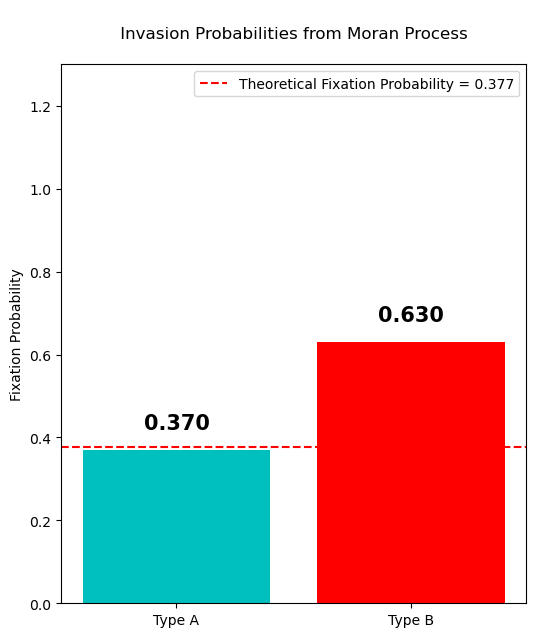

In [21]:
fig, axes = plt.subplots(figsize=(6,7))
axes.bar([0,1], fixation_probs, color=['c','r'])
axes.annotate(f"{fixation_probs[0]:.3f}", xy=(0, fixation_probs[0]), xytext=(0, fixation_probs[0]+0.05), ha='center', fontsize=15, fontweight='bold', color='black')
axes.annotate(f"{fixation_probs[1]:.3f}", xy=(1, fixation_probs[1]), xytext=(1, fixation_probs[1]+0.05), ha='center', fontsize=15, fontweight='bold', color='black')
axes.axhline(y=prob_pt5, color='r', linestyle='--', label=f'Theoretical Fixation Probability = {prob_pt5:.3f}')
axes.set_xticks([0,1])
axes.set_xticklabels(['Type A','Type B'])
axes.set_ylabel("Fixation Probability")
axes.set_ylim(0,1.3)
axes.set_title("\n Invasion Probabilities from Moran Process \n")
axes.legend()
# fig.savefig("images/moran_selection_p2_1000.png", dpi=300)